<a href="https://colab.research.google.com/github/FernandaBarbabosa/M2-Modelos_Estadisticos/blob/main/Tarea_experimento_2_dados_y_gr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos a modelar con un experimento aleatorio, la ley (función de densidad) de una v.a. uniforme discreta

##Diccionarios

Un diccionario es un objeto que se crea a partir de algo que se llama "llave" y nos arroja valores:

\{ key: values \}

Es como trabajar una tabla en Excel, donde de preferencia debería de haber la misma cantidad de valores en cada lista que agregues


In [ ]:
d={"Fernanda":["Masha","Snow"],
      "Nivel":[7,10],
      "Calificaciones":[6.2,8.3]}
d

{'Fernanda': ['Masha', 'Snow'], 'Nivel': [7, 10], 'Calificaciones': [6.2, 8.3]}

In [ ]:
type(d) #Tipo

dict

In [ ]:
d.keys() #Son las llaves del diccionario d

dict_keys(['Fernanda', 'Nivel', 'Calificaciones'])

In [ ]:
d.values() #Valores correspondientes de cada llave

dict_values([['Masha', 'Snow'], [7, 10], [6.2, 8.3]])

In [ ]:
#Como el diccionario es un conjunto de listas, no puedes acceder directamente
d.values()[0]

TypeError: 'dict_values' object is not subscriptable

In [ ]:
d.items() #Da los elementos de cada uno de los pares ordenados del directorio

dict_items([('Fernanda', ['Masha', 'Snow']), ('Nivel', [7, 10]), ('Calificaciones', [6.2, 8.3])])

#Ejemplo de la v.a. uniforme

Sea el experimento aleatorio de lanzar dos dados justos:

* $\Omega = \{1,2,3,4,5,6\} \times \{1,2,3,4,5,6\}$
* $\mathcal{F} = P (\Omega)$
* Para $w=(i,j)$ donde $i,j \in\{1,...,6\}$ tal que

  $$\mathbb{P}(\{\omega\})=\frac{1}{36}$$
  
Vamos a definir a la siguienute variable aleatoria

$$S:\Omega \to R_{S} $$

donde $R_{S}=\{2,3,4,5,6,7,8,9,10,11,12\}$

Para que entendamos la ley de una v.a, basta con entender los siguientes datos

$$\{(k, \mathbb{P}(S=k))\}_{k \in R_{S}}$$


Vamos a entender a S como eventos.

Sea $S_n$ el evento donde la suma de las caras da $n$

$$S_{n} = \{(i,j)\in \Omega \mid i+j=k \}$$


In [ ]:
from itertools import product #Para el producto cartesiano
from fractions import Fraction #para poder usar la función fraccion

Primero vamos a crear una función de probabilidad global:

In [ ]:
def P(A,Omega):
  P=Fraction(len(A),len(Omega))
  return P

In [ ]:
S_2={(i,j) for i in range (1,7) for j in range(1,7)
  if i+j==2}
S_2
# En este caso se tendría que hacer cada caso hasta que i+j sea 12,
#por lo que mejor usamos un diccionario

{(1, 1)}

Nota. Realizar esto para cada valor de $n$ quita tiempo. Vamos a hacer esto más rápido utilizando diccionarios

In [ ]:
#Primero vamos a crear a nuestro espacio muestral Omega
L=[i for i in range (1,7)] #Lista por comprensión
#print(L)
Omega= set(product(L,repeat=2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [ ]:
S={(i,j):i+j for i,j in Omega} #Da la suma de cada uno de los pares ordenados
S

{(3, 4): 7,
 (4, 3): 7,
 (3, 1): 4,
 (5, 4): 9,
 (4, 6): 10,
 (5, 1): 6,
 (2, 2): 4,
 (1, 6): 7,
 (2, 5): 7,
 (1, 3): 4,
 (6, 2): 8,
 (6, 5): 11,
 (4, 2): 6,
 (4, 5): 9,
 (3, 3): 6,
 (5, 6): 11,
 (3, 6): 9,
 (5, 3): 8,
 (2, 4): 6,
 (1, 2): 3,
 (2, 1): 3,
 (1, 5): 6,
 (6, 1): 7,
 (6, 4): 10,
 (3, 2): 5,
 (4, 1): 5,
 (3, 5): 8,
 (5, 2): 7,
 (4, 4): 8,
 (5, 5): 10,
 (1, 1): 2,
 (1, 4): 5,
 (2, 3): 5,
 (2, 6): 8,
 (6, 6): 12,
 (6, 3): 9}

In [ ]:
#Vamos a crear un diccionario por default de manera sintética y arreglada
from collections import defaultdict
dS=defaultdict(set) #los parentesis los rellenas con set porque vas a agregar conjuntos
dS

defaultdict(set, {})

Vamos a añadir elementos a un diccionario que está vacío

In [ ]:
for (i,j) in S.items():
  #print(j)
#Si imprimo j, me da los valores del diccionario
#Si imprimo i, me da los elementos de la izquierda (llaves)

SyntaxError: incomplete input (<ipython-input-43-c3f388926422>, line 4)

In [ ]:
for i,j in S.items():
  dS[j].add(i) #añadiendo al diccionario las llaves
dS

defaultdict(set,
            {7: {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)},
             4: {(1, 3), (2, 2), (3, 1)},
             9: {(3, 6), (4, 5), (5, 4), (6, 3)},
             10: {(4, 6), (5, 5), (6, 4)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             11: {(5, 6), (6, 5)},
             3: {(1, 2), (2, 1)},
             5: {(1, 4), (2, 3), (3, 2), (4, 1)},
             2: {(1, 1)},
             12: {(6, 6)}})

In [ ]:
#A cada elemento de la suma (k), le voy a dar una subprobabilidad
#A es un conjunto de omega donde las k son las sumas del conjunto dS
leyS={k: P(A,Omega) for k,A in dS.items()}
leyS
#El resultado que te da es la función de densidad la cual se interpreta como:
#1/6 si k=7 porque son 6 pares ordenados con posibilidad de dar suma 7 de los 36 pares totales de omega
#1/12 si k=4, 1/9 si k=9,...

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

#Introducción a Pandas en Python


In [ ]:
import pandas as pd

In [ ]:
leyS=pd.Series(leyS) #Darle forma de matriz al resultado de leyS
leyS=leyS.sort_index() #Ordena la columna de las sumas de la menor a mayor
leyS

,0
2,1/36
3,1/18
4,1/12
5,1/9
6,5/36
7,1/6
8,5/36
9,1/9
10,1/12
11,1/18


#Tarea: Ejercicios de v.a lanzamiento de dos dados#

**Ejercicios**


1.   Documenta tu colab
2.   Calcular la ley de las siguientes variables aleatorias
    - La diferencia de las caras es mayor a 1
    - La suma de las caras sea par
3.   Verificar en cada caso, que
$$\sum_{k\in R_{X}}\mathbb{P}(X=k)=1$$

4.  Grafica la función de distribución de la v.a. $S= \{(i,j)\in \Omega \mid i+j=k \}$
5.   Sube tu notebook a GitHub









##Calcular la ley de la v.a la diferencia de las caras es mayor a 1

Utilizando la lista $L= [1,2,3,4,5,6]$ con los número posibles del dado y al conjunto
$\Omega = \{1,2,3,4,5,6\} \times \{1,2,3,4,5,6\}$  que contiene a los posibles pares ordenados de lanzar los dos dados.

Se define al conjunto $S_{d}$ un subconjunto de $\Omega$ para conocer los distintos pares con su valor de diferencia que cumpla la definición de la v.a.

In [1]:
from itertools import product #Para el producto cartesiano
from fractions import Fraction #para poder usar la función fraccion

In [ ]:
#Prueba para conocer todas las diferencias de los pares al lanzar dos dados
S_dp={(i,j):i-j for i,j in Omega}
S_dp

{(3, 4): -1,
 (4, 3): 1,
 (3, 1): 2,
 (5, 4): 1,
 (4, 6): -2,
 (5, 1): 4,
 (2, 2): 0,
 (1, 6): -5,
 (2, 5): -3,
 (1, 3): -2,
 (6, 2): 4,
 (6, 5): 1,
 (4, 2): 2,
 (4, 5): -1,
 (3, 3): 0,
 (5, 6): -1,
 (3, 6): -3,
 (5, 3): 2,
 (2, 4): -2,
 (1, 2): -1,
 (2, 1): 1,
 (1, 5): -4,
 (6, 1): 5,
 (6, 4): 2,
 (3, 2): 1,
 (4, 1): 3,
 (3, 5): -2,
 (5, 2): 3,
 (4, 4): 0,
 (5, 5): 0,
 (1, 1): 0,
 (1, 4): -3,
 (2, 3): -1,
 (2, 6): -4,
 (6, 6): 0,
 (6, 3): 3}

In [ ]:
#Da la diferencia de cada uno de los pares ordenados con diferencia mayor a 1
S_d={(i,j):i-j for i,j in Omega if i-j>1}
S_d

{(3, 1): 2,
 (5, 1): 4,
 (6, 2): 4,
 (4, 2): 2,
 (5, 3): 2,
 (6, 1): 5,
 (6, 4): 2,
 (4, 1): 3,
 (5, 2): 3,
 (6, 3): 3}

In [ ]:
#Define al conjunto Omega2, conformado por los pares ordenados para obtener su cardinalidad
Omega2=S_d.keys()
Omega2

dict_keys([(3, 1), (5, 1), (6, 2), (4, 2), (5, 3), (6, 1), (6, 4), (4, 1), (5, 2), (6, 3)])

In [ ]:
#Cardinalidad de Omega2
len(Omega2)

10

In [ ]:
#Se define la función que considera al evento A y a Omega2
#para poder conocer la probabilidad de ocurrencia
def P2(A,Omega2):
  P2=Fraction(len(A),len(Omega2))
  return P2

In [ ]:
#Vamos a crear un diccionario por default de manera sintética y arreglada
from collections import defaultdict
dS_d=defaultdict(set) #los parentesis los rellenas con set porque vas a agregar conjuntos
dS_d

defaultdict(set, {})

In [ ]:
#Si imprimo j, me da los resultados de las diferencias de los pares del diccionario
#Si imprimo i, me da los elementos de la izquierda (llaves)
for i,j in S_d.items():
  dS_d[j].add(i) #Para cada j, añades al diccionario la llave i
dS_d

defaultdict(set,
            {2: {(3, 1), (4, 2), (5, 3), (6, 4)},
             4: {(5, 1), (6, 2)},
             5: {(6, 1)},
             3: {(4, 1), (5, 2), (6, 3)}})

In [ ]:
leyS_d={k: P2(A,Omega2) for k,A in dS_d.items()}
leyS_d

{2: Fraction(2, 5), 4: Fraction(1, 5), 5: Fraction(1, 10), 3: Fraction(3, 10)}

In [ ]:
import pandas as pd
leyS_d=pd.Series(leyS_d) #Darle forma de matriz al resultado de leyS_d
leyS_d=leyS_d.sort_index() #Ordena la columna de las sumas de la menor a mayor
leyS_d

,0
2,2/5
3,3/10
4,1/5
5,1/10


- Por lo tanto la  para la variable aleatoria $
S_{d} =
\begin{cases}
(i,j)\in \Omega \mid&\text{i-j=k > 1 }\}
\end{cases}
$

> $$
f(x) =
\begin{cases}
\frac{4}{10} & \text{, si } x=2\\
\frac{3}{10} & \text{, si } x=3\\
\frac{2}{10} & \text{, si } x=4\\
\frac{1}{10} & \text{, si } x=5\\
0 & \text{, e.o.c}
\end{cases}
$$

- Verificar que
$$\sum_{k\in R_{X}}\mathbb{P}(X=k)=1$$

$$\mathbb{P}(X=2)+\mathbb{P}(X=3)+\mathbb{P}(X=4)+\mathbb{P}(X=5)=1$$


$$\frac{4}{10}+\frac{3}{10}+\frac{2}{10}+\frac{1}{10}= 1$$





In [3]:
#Comprobar que la función de densidad es igual a 1
Fx=Fraction(4,10)+Fraction(3,10)+Fraction(2,10)+Fraction(1,10)
Fx

Fraction(1, 1)

##Calcular la ley de la v.a la suma de las caras es par

Utilizando la lista $L= [1,2,3,4,5,6]$ con los número posibles del dado y al conjunto
$\Omega = \{1,2,3,4,5,6\} \times \{1,2,3,4,5,6\}$  que contiene a los posibles pares ordenados de lanzar los dos dados.

Se define al conjunto $S_{par}$ un subconjunto de $\Omega$ para conocer los distintos pares con su valor de diferencia que cumpla la definición de la v.a.

In [ ]:
from itertools import product #Para el producto cartesiano
from fractions import Fraction #para poder usar la función fraccion

In [ ]:
#Da la diferencia de cada uno de los pares ordenados son suma par
S_par={(i,j):i+j for i,j in Omega if (i+j)%2==0}
S_par

{(3, 1): 4,
 (4, 6): 10,
 (5, 1): 6,
 (2, 2): 4,
 (1, 3): 4,
 (6, 2): 8,
 (4, 2): 6,
 (3, 3): 6,
 (5, 3): 8,
 (2, 4): 6,
 (1, 5): 6,
 (6, 4): 10,
 (3, 5): 8,
 (4, 4): 8,
 (5, 5): 10,
 (1, 1): 2,
 (2, 6): 8,
 (6, 6): 12}

In [ ]:
#Definir Omega3 como el conjunto de posibles resultados para obtener su cardinalidad y definir la función
Omega3=S_par.keys()
Omega3

dict_keys([(3, 1), (4, 6), (5, 1), (2, 2), (1, 3), (6, 2), (4, 2), (3, 3), (5, 3), (2, 4), (1, 5), (6, 4), (3, 5), (4, 4), (5, 5), (1, 1), (2, 6), (6, 6)])

In [ ]:
len(Omega3)

18

In [ ]:
#Se define la función que considera al evento A y a Omega3
#para poder conocer la probabilidad de ocurrencia
def P3(A,Omega3):
  P3=Fraction(len(A),len(Omega3))
  return P3

In [ ]:
#Vamos a crear un diccionario por default de manera sintética y arreglada
from collections import defaultdict
dS_par=defaultdict(set) #los parentesis los rellenas con set porque vas a agregar conjuntos
dS_par

defaultdict(set, {})

In [ ]:
#Si imprimo j, me da los resultados de las sumas de los pares del diccionario
#Si imprimo i, me da los elementos de la izquierda (llaves)
for i,j in S_par.items():
  dS_par[j].add(i) #Para cada j, añades al diccionario la llave i
dS_par

defaultdict(set,
            {4: {(1, 3), (2, 2), (3, 1)},
             10: {(4, 6), (5, 5), (6, 4)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             2: {(1, 1)},
             12: {(6, 6)}})

In [ ]:
leyS_par={k: P3(A,Omega3) for k,A in dS_par.items()}
leyS_par

{4: Fraction(1, 6),
 10: Fraction(1, 6),
 6: Fraction(5, 18),
 8: Fraction(5, 18),
 2: Fraction(1, 18),
 12: Fraction(1, 18)}

In [ ]:
import pandas as pd
leyS_par=pd.Series(leyS_par) #Darle forma de matriz al resultado de leyS_d
leyS_par=leyS_par.sort_index() #Ordena la columna de las sumas de la menor a mayor
leyS_par

,0
2,1/18
4,1/6
6,5/18
8,5/18
10,1/6
12,1/18


- Por lo tanto la  para la variable aleatoria $
S_{par} =
\begin{cases}
(i,j)\in \Omega \mid&\text{i+j=k es par }\}
\end{cases}
$

> $$
f(x) =
\begin{cases}
\frac{1}{18} & \text{, si } x \in \{2,12\}\\
\frac{3}{18} & \text{, si } x \in \{4,10\}\\
\frac{5}{18} & \text{, si } x \in \{6,8\} \\
0 & \text{ , e.o.c}
\end{cases}
$$

- Verificar que
$$\sum_{k\in R_{X}}\mathbb{P}(X=k)=1$$

$$\mathbb{P}(X=2)+\mathbb{P}(X=4)+\mathbb{P}(X=6)+\mathbb{P}(X=8)+\mathbb{P}(X=10)+\mathbb{P}(X=12)=1$$


$$\frac{1}{18}+\frac{3}{18}+\frac{5}{18}+\frac{5}{18}+\frac{3}{18}+\frac{1}{18}= 1$$

In [5]:
#Comprobar que la función de densidad es igual a 1
Fx_par=Fraction(1,18)+Fraction(3,18)+Fraction(5,18)+Fraction(5,18)+Fraction(3,18)+Fraction(1,18)
Fx_par

Fraction(1, 1)

# Graficar la distribución de la v.a. S
Dibuja a la función de distribución acumulada de la variable aleatoria:
$$S:\{1,2,3,4,5,6\}^{2}\to \{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 \}$$
dada por
$$S= \{(i,j)\in \Omega \mid i+j=k \}$$

##Función de densidad

> $$
f(x) =
\begin{cases}
\frac{1}{36} & \text{, si } x=2\\
\frac{2}{36} & \text{, si } x=3\\
\frac{3}{36} & \text{, si } x=4\\
\frac{4}{36} & \text{, si } x=5\\
\frac{5}{36} & \text{, si } x=6\\
\frac{6}{36} & \text{, si } x=7\\
\frac{5}{36} & \text{, si } x=8\\
\frac{4}{36} & \text{, si } x=9\\
\frac{3}{36} & \text{, si } x=10\\
\frac{2}{36} & \text{, si } x=11\\
\frac{1}{36} & \text{, si } x=12\\
0 & \text{ , e.o.c}
\end{cases}
$$

##Función de distribución acumulada
> $$
F(x) =
\begin{cases}
0 & \text{, si } x< 2\\
\frac{1}{36} & \text{, si } x\leq 2\\
\frac{3}{36} & \text{, si } 2<x\leq 3\\
\frac{6}{36} & \text{, si } 3<x\leq 4\\
\frac{10}{36} & \text{, si } 4<x \leq 5\\
\frac{15}{36} & \text{, si } 5<x \leq 6\\
\frac{21}{36} & \text{, si } 6<x \leq 7\\
\frac{26}{36} & \text{, si } 7<x \leq 8\\
\frac{30}{36} & \text{, si } 8<x \leq 9\\
\frac{33}{36} & \text{, si } 9<x \leq 10\\
\frac{35}{36} & \text{, si } 10<x \leq 11\\
1 & \text{, si } x \geq 12\\
\end{cases}
$$





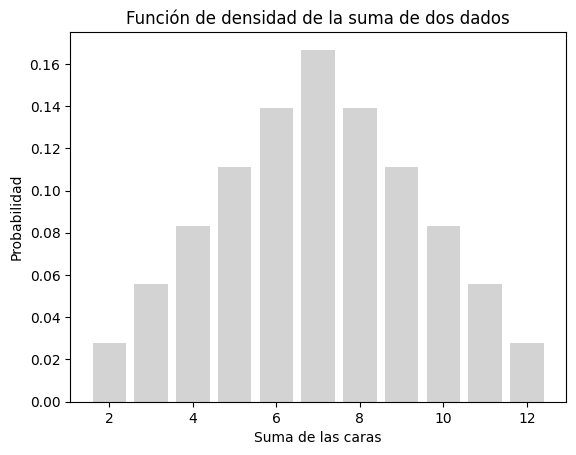

In [ ]:
import matplotlib.pyplot as plt

# Valores posibles de la suma de las caras de dos dados
sumas = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Probabilidades asociadas a cada suma
prob = [ 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]

# Crear la gráfica
plt.bar(sumas, prob, color='lightgray')

# Etiquetas de la gráfica
plt.title('Función de densidad de la suma de dos dados')
plt.xlabel('Suma de las caras')
plt.ylabel('Probabilidad')

# Mostrar la gráfica
plt.show()

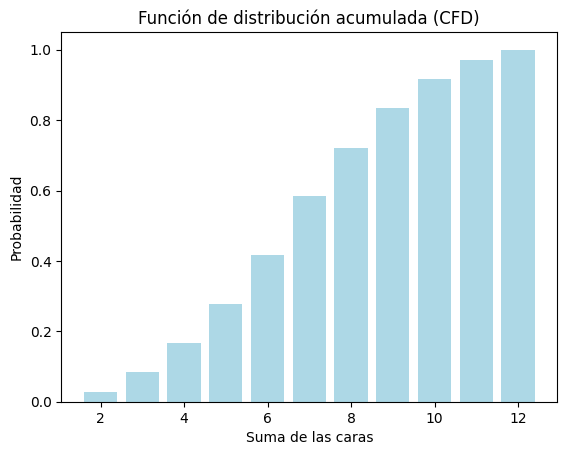

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los puntos clave de la CDF basados en la imagen
x_valores = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
cdf_valores = [1/36, 3/36, 6/36, 10/36, 15/36, 21/36, 26/36, 30/36, 33/36, 35/36, 1]

# Crear la gráfica
plt.bar(x_valores, cdf_valores, color='lightblue')

# Etiquetas de la gráfica
plt.title('Función de distribución acumulada (CFD)')
plt.xlabel('Suma de las caras')
plt.ylabel('Probabilidad acumulada')

# Mostrar la gráfica
plt.show()